In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score



In [49]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [10]:
df.shape

(1599, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
print(f'# de linhas: {df.shape[0]}')
print(f'# de colunas: {df.shape[1]}')


# de linhas: 1599
# de colunas: 12


In [28]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [42]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [56]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [17]:
df[['fixed acidity','pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


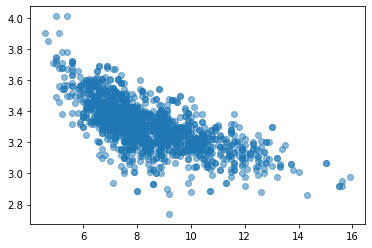

In [59]:
plt.scatter(df['fixed acidity'], df['pH'], alpha=0.5)
plt.show()

In [18]:
df[['quality','alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


In [22]:
dados_5 = df['quality']==5
dados_5.sum()

681

In [23]:
X = df.drop('quality', axis=1)
y = df['quality']



In [24]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [26]:
X[0].min()

0.0

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=1)

In [36]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN = clf_KNN.fit( X_train,y_train)
predict_KNN = model_KNN.predict(X_test)
print(model_KNN.score(X_train, y_train))
print(model_KNN.score(X_test, y_test ))

0.7283288650580876
0.5645833333333333


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
model_arvore= clf_arvore.fit( X_train,y_train)
predict_arvore = model_arvore.predict(X_test)
print(model_arvore.score(X_train, y_train))
print(model_arvore.score(X_test, y_test ))

1.0
0.6020833333333333


In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
model_floresta= clf_floresta.fit( X_train,y_train)
predict_floresta = model_floresta.predict(X_test)
print(model_floresta.score(X_train, y_train))
print(model_floresta.score(X_test, y_test ))

0.9571045576407506
0.6791666666666667


In [39]:
from sklearn.svm import SVC
clf_svm = SVC()
model_svc= clf_svm.fit(X_train,y_train)
predict_svc = model_svc.predict(X_test)
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test ))

0.6514745308310992
0.6020833333333333


In [40]:
clf_mlp = MLPClassifier()
model_mlp= clf_mlp.fit(X_train,y_train)
predict_mlp = model_mlp.predict(X_test)
print(model_mlp.score(X_train, y_train))
print(model_mlp.score(X_test, y_test ))

0.6291331546023236
0.5979166666666667


C:\Users\thiag\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual é o valor mais próximo da acurácia do modelo para esse novo dataset

In [46]:
for i in df['quality']:
    if (i == 6) | ( i==7) | (i==8):
        df['quality']= dados['quality'].apply(lambda x : str(x).replace('6','bons'))
        df['quality']=dados['quality'].apply(lambda x : str(x).replace('7','bons'))
        df['quality'] =dados['quality'].apply(lambda x : str(x).replace('8','bons'))
else:
    df['quality']=dados['quality'].apply(lambda x : str(x).replace('5','ruins'))
    df['quality']=dados['quality'].apply(lambda x : str(x).replace('4','ruins'))
    df['quality'] = dados['quality'].apply(lambda x : str(x).replace('3','ruins'))



In [51]:
le = LabelEncoder()
y = le.fit_transform(df['quality'])




In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
model_floresta= clf_floresta.fit( X_train,y_train)
predict_floresta = model_floresta.predict(X_test)
print(model_floresta.score(X_train, y_train))
print(model_floresta.score(X_test, y_test ))


0.9571045576407506
0.6791666666666667


# Nova seção